<a href="https://colab.research.google.com/github/colawhite/AllstateStudyGrp/blob/master/model_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
!pip install scikit-optimize

In [5]:
import skopt
from skopt import BayesSearchCV

In [6]:
boston = load_boston()
X, Y, feature = boston.data, boston.target,boston.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
X_train = pd.DataFrame(X_train)
X_train.columns = feature
X_test = pd.DataFrame(X_test)
X_test.columns = feature

In [20]:
reg = xgb.XGBRegressor(
        n_jobs = 1,
        objective = 'reg:squarederror',
        eval_metric = 'rmse',
        silent=1,
        random_state=123,
        tree_method='approx',
    )

In [21]:
fit_params={"early_stopping_rounds":25, 
            "verbose":0,
            "eval_set" : [[X_train,y_train],[X_test, y_test]]}

In [31]:
bayes_cv_tuner = BayesSearchCV(
    reg,
    search_spaces = {
        'n_estimators': (1,10)
    },
    n_iter = 5,
    scoring='explained_variance',
    random_state = 456,
    fit_params=fit_params)

In [32]:
grid_cv_tuner = GridSearchCV(
    reg,
    param_grid = {
        'n_estimators':[1,5,10],
        'random_state':[456]
    },
    scoring='neg_mean_squared_error',
)

In [33]:
bayes_results = bayes_cv_tuner.fit(X_train,y_train)
grid_results = grid_cv_tuner.fit(X_train,y_train, **fit_params)

In [35]:
bayes_results.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=9, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1,
             tree_method='approx', verbosity=1)

In [34]:
grid_results.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=10, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=456, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1,
             tree_method='approx', verbosity=1)

In [15]:
pd.DataFrame(grid_results.best_estimator_.evals_result()).head()

,validation_0,validation_1
rmse,"[21.788282, 19.743141, 17.904982, 16.253366, 1...","[21.25984, 19.265194, 17.487741, 15.877626, 14..."


In [64]:
regx = xgb.XGBRegressor(
        n_jobs = 1,
        n_estimators = 10,
        objective = 'reg:gamma',
        eval_metric = 'rmse',
        silent=1,
        random_state=123,
        tree_method='approx',
    )

In [65]:
fit_params={"early_stopping_rounds":1, 
            "verbose":0,
            "eval_set" : [(X_train,y_train),(X_test, y_test)]}
regx = regx.fit(X_train,y_train,**fit_params)

In [66]:
regx.evals_result()['validation_0']['rmse'][-3:]

[23.523346, 23.42408, 23.315548]

In [67]:
regx.evals_result()['validation_1']['rmse'][-3:]

[22.942204, 22.841974, 22.732164]

In [48]:
grid_results.best_estimator_.evals_result()['validation_0']['rmse'][-3:]

[11.148124, 10.178438, 9.307384]

In [49]:
grid_results.best_estimator_.evals_result()['validation_1']['rmse'][-3:]

[10.955668, 10.026828, 9.22725]

In [46]:
bayes_results.best_estimator_.evals_result()['validation_0']['rmse'][-3:]

[11.969361, 10.955668, 10.026828]

In [47]:
bayes_results.best_estimator_.evals_result()['validation_1']['rmse'][-3:]

[11.969361, 10.955668, 10.026828]

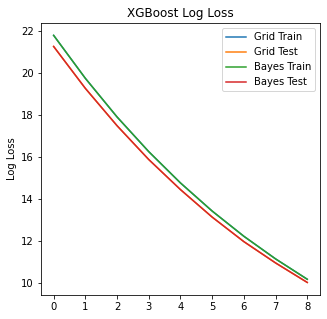

In [45]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
grids = grid_results.best_estimator_.evals_result()
bayes = bayes_results.best_estimator_.evals_result()

epochs = len(grids['validation_0']['rmse'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis[:9], grids['validation_0']['rmse'][:9], label='Grid Train')
ax.plot(x_axis[:9], grids['validation_1']['rmse'][:9], label='Grid Test')
ax.plot(x_axis[:9], bayes['validation_0']['rmse'][:9], label='Bayes Train')
ax.plot(x_axis[:9], bayes['validation_1']['rmse'][:9], label='Bayes Test')
#ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()


{'validation_0': {'rmse': [21.25984,
   19.265194,
   17.487741,
   15.877626,
   14.447087,
   13.137541,
   11.969361,
   10.955668,
   10.026828,
   9.22725,
   8.476295,
   7.84398,
   7.277647,
   6.771502,
   6.317042,
   5.908906,
   5.561435,
   5.282437,
   5.046112,
   4.798521,
   4.595921,
   4.44015,
   4.300373,
   4.135522,
   4.019499,
   3.924052,
   3.854388,
   3.806644,
   3.766329,
   3.670498,
   3.633506,
   3.555486,
   3.512729,
   3.451569,
   3.431915,
   3.411958,
   3.402566,
   3.390428,
   3.377381,
   3.365988,
   3.352717,
   3.339757,
   3.325475,
   3.320718,
   3.311262,
   3.300411,
   3.272575,
   3.263335,
   3.258413,
   3.250991,
   3.240807,
   3.230006,
   3.22301,
   3.220562,
   3.208307,
   3.205546,
   3.188334,
   3.173725,
   3.166145,
   3.163427,
   3.146179,
   3.140741,
   3.127241,
   3.125607,
   3.113947,
   3.107767,
   3.104795,
   3.100835,
   3.097001,
   3.082849,
   3.080607,
   3.085101,
   3.080043,
   3.072639,
   3.06988

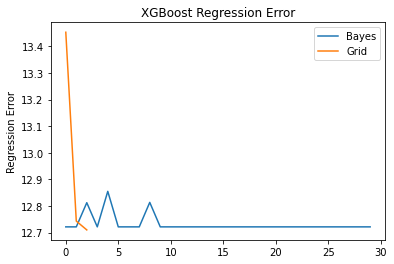

In [17]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
x_axis = range(0, 30)
bayes_score = [-x for x in bayes_results.cv_results_['mean_test_score']]
grid_score = [-x for x in grid_results.cv_results_['mean_test_score']]
ax.plot(x_axis, bayes_score, label='Bayes')
ax.plot(x_axis[:3], grid_score, label='Grid')
ax.legend()
pyplot.ylabel('Regression Error')
pyplot.title('XGBoost Regression Error')
pyplot.show()

In [77]:
from sklearn.inspection import plot_partial_dependence

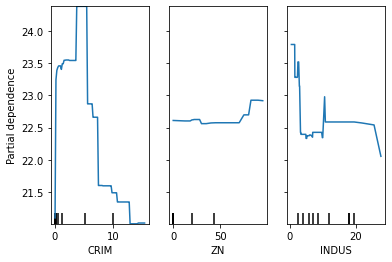

In [104]:
plot_partial_dependence(grid_results.best_estimator_, X_train, features=[0,1,2], feature_names=feature[:3]) 

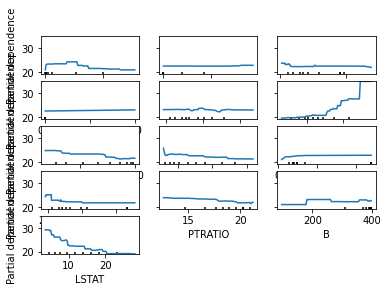

In [95]:
plot_partial_dependence(bayes_results.best_estimator_, X_train, feature) 

In [106]:
!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=cc96b86a23a2b8cab14da89db2394d0f17ccd7e62fc1f58cf92dba7c02287c5a
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


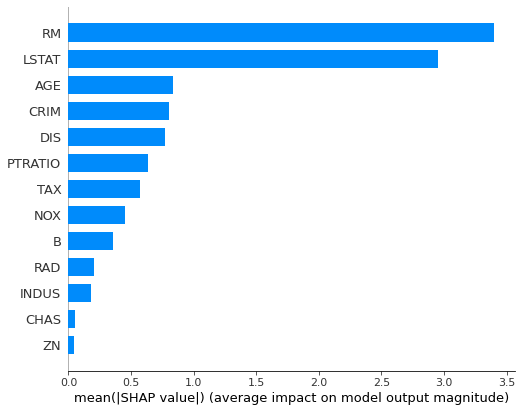

In [107]:
import shap
shap_values = shap.TreeExplainer(grid_results.best_estimator_).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

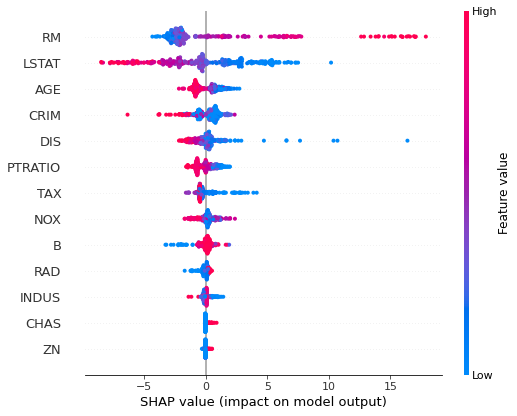

In [109]:
shap.summary_plot(shap_values, X_train)